In [137]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [138]:
df = pd.read_csv("IPL 2024 SOLD PLAYER DATA ANALYSIS.csv",low_memory=False)

In [139]:
df.head()

,S_No,PLAYERS,NATIONALITY,TYPE,PRICE,TEAM
0,0,Avanish Rao Aravelly,Indian,Wicket-Keeper,2000000,CSK
1,1,Mustafizur Rahman,Overseas,Bowler,20000000,CSK
2,2,Daryl Mitchell,Overseas,All-Rounder,140000000,CSK
3,3,Sameer Rizvi,Indian,Batter,84000000,CSK
4,4,Rachin Ravindra,Overseas,All-Rounder,18000000,CSK


# **Basic Data Exploration**

In [140]:
df.shape

(332, 6)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   S_No         332 non-null    int64 
 1   PLAYERS      332 non-null    object
 2   NATIONALITY  332 non-null    object
 3   TYPE         332 non-null    object
 4   PRICE        332 non-null    int64 
 5   TEAM         332 non-null    object
dtypes: int64(2), object(4)
memory usage: 15.7+ KB


In [142]:
# Players Indian vs Overseas
indian_players = df[df["NATIONALITY"] == "Indian"].shape[0]
overseas_players = df[df["NATIONALITY"] != "Overseas"].shape[0]

print(f"Number of Indian players: {indian_players}")
print(f"Number of Overseas players: {overseas_players}")

Number of Indian players: 216
Number of Overseas players: 216


In [143]:
# Average price of players

avg_price = np.average(df["PRICE"])
print("Average price of players:₹{:,.2f}".format(avg_price))

Average price of players:₹10,093,373.49


In [144]:
# Unique player types
# Use set() to get unique types
unique_types = set(df["TYPE"])
print(unique_types)

{'Wicket-Keeper', 'Batter', 'Bowler', 'All-Rounder'}


In [145]:
# Team with most players

players = df.groupby("TEAM").size().nlargest()
most_player = players.idxmax()
print(players)



TEAM
Un-Sold    260
KKR         10
DC           9
GT           8
MI           8
dtype: int64


# **Grouping and Aggregation**

In [146]:
# Total amount spent per team
from sklearn import datasets
from IPython.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
total_amount_spent = df.groupby(['TEAM']).agg({'PRICE':['sum']}).style.format("₹{:,.2f}")
display (total_amount_spent)
print(total_amount_spent)

,PRICE
,sum
TEAM,
CSK,"₹304,000,000.00"
DC,"₹190,500,000.00"
GT,"₹303,000,000.00"
KKR,"₹313,500,000.00"
LSG,"₹122,000,000.00"
MI,"₹167,000,000.00"
PK,"₹249,500,000.00"
RCB,"₹204,000,000.00"


In [147]:
#Team spent max amount
df1 = df.drop(df[df["TEAM"]=="Un-Sold"].index)
amount_spent = df1.groupby(['TEAM'])['PRICE'].sum().sort_values(ascending=False).head(1)
display (amount_spent)
print(amount_spent)

,PRICE
TEAM,
KKR,313500000


TEAM
KKR    313500000
Name: PRICE, dtype: int64


In [148]:
# The average price of Indian players vs Overseas players

avg_price = df.groupby('NATIONALITY').agg({'PRICE':['mean']}).style.format("₹{:,.2f}")
display (avg_price)
print(avg_price)

,PRICE
,mean
NATIONALITY,
Indian,"₹5,400,462.96"
Overseas,"₹18,831,896.55"


In [149]:
# Number of players per type
players_per_type = df.groupby('TYPE').size()
print(players_per_type)

TYPE
All-Rounder      114
Batter            53
Bowler           128
Wicket-Keeper     37
dtype: int64


In [150]:
#Average price fo each palyer type
avg_price = df.groupby('TYPE').agg({'PRICE':['mean']}).style.format("₹{:,.2f}")
display (avg_price)
print(avg_price)

,PRICE
,mean
TYPE,
All-Rounder,"₹9,934,210.53"
Batter,"₹11,669,811.32"
Bowler,"₹10,511,718.75"
Wicket-Keeper,"₹6,878,378.38"


In [151]:
# Players who were bought for more than ₹5 crores
high_priced_players = df[df['PRICE'] > 50000000]
print(high_priced_players)

    S_No          PLAYERS NATIONALITY           TYPE      PRICE TEAM
2      2   Daryl Mitchell    Overseas    All-Rounder  140000000  CSK
3      3     Sameer Rizvi      Indian         Batter   84000000  CSK
12    12   Kumar Kushagra      Indian  Wicket-Keeper   72000000   DC
16    16  Spencer Johnson    Overseas         Bowler  100000000   GT
21    21    Shahrukh Khan      Indian    All-Rounder   74000000   GT
22    22      Umesh Yadav      Indian         Bowler   58000000   GT
27    27   Mitchell Starc    Overseas         Bowler  247500000  KKR
36    36      Shivam Mavi      Indian         Bowler   64000000  LSG
52    52    Rilee Rossouw    Overseas         Batter   80000000   PK
54    54    Harshal Patel      Indian    All-Rounder  117500000   PK
55    55    Shubham Dubey      Indian         Batter   58000000   RR
56    56    Rovman Powell    Overseas         Batter   74000000   RR
63    63   Alzarri Joseph    Overseas         Bowler  115000000  RCB
70    70      Pat Cummins    Overs

In [152]:
#Most expensive palyer
pd.options.mode.copy_on_write = True
most_expensive_player = df[df['PRICE'] == df['PRICE'].max()]
most_expensive_player["PRICE"] = df["PRICE"].map("₹{:,.2f}".format)
print(most_expensive_player)

    S_No         PLAYERS NATIONALITY    TYPE            PRICE TEAM
27    27  Mitchell Starc    Overseas  Bowler  ₹247,500,000.00  KKR


In [153]:
#Team with most overseas players
overseas_players = df[(df['NATIONALITY'] != 'Indian') & (df['TEAM'] != 'Un-Sold')]
team_with_most_overseas = overseas_players.groupby('TEAM').size().idxmax()
print(team_with_most_overseas)

DC


In [154]:
# List of Wicket-Keepers and their respective teams and prices.
wicket_keepers = df[(df['TYPE'] == 'Wicket-Keeper') & (df['TEAM'] != 'Un-Sold')]

list_wicket_keepers = wicket_keepers[['PLAYERS', 'TEAM', 'PRICE']]
list_wicket_keepers["PRICE"] = df["PRICE"].map("₹{:,.2f}".format)
print(list_wicket_keepers)


                 PLAYERS TEAM           PRICE
0   Avanish Rao Aravelly  CSK   ₹2,000,000.00
6             Ricky Bhui   DC   ₹2,000,000.00
10             Shai Hope   DC   ₹7,500,000.00
12        Kumar Kushagra   DC  ₹72,000,000.00
13        Tristan Stubbs   DC   ₹5,000,000.00
18            Robin Minz   GT  ₹36,000,000.00
30           K.S. Bharat  KKR   ₹5,000,000.00
59    Tom Kohler-Cadmore   RR   ₹4,000,000.00


In [155]:
#Expensive indian player
indian_players = df[(df['NATIONALITY'] == 'Indian') & (df['TEAM'] != 'Un-Sold')]
indian_players["PRICE"] = df["PRICE"].map("₹{:,.2f}".format)
most_expensive_indian = indian_players.groupby('PLAYERS')['PRICE'].sum().sort_values(ascending=False).head(3)
print(most_expensive_indian)

PLAYERS
Sameer Rizvi      ₹84,000,000.00
Shahrukh Khan     ₹74,000,000.00
Kumar Kushagra    ₹72,000,000.00
Name: PRICE, dtype: object


# **Advanced/Insightful**

In [156]:
# Team spent the most per player on average
avg_price_per_player = df.groupby(['TEAM']).agg({'PRICE':['mean']}).style.format("₹{:,.2f}")
display (avg_price_per_player)
print(avg_price_per_player)

,PRICE
,mean
TEAM,
CSK,"₹50,666,666.67"
DC,"₹21,166,666.67"
GT,"₹37,875,000.00"
KKR,"₹31,350,000.00"
LSG,"₹20,333,333.33"
MI,"₹20,875,000.00"
PK,"₹31,187,500.00"
RCB,"₹34,000,000.00"


In [185]:
# The number of players by type for each team.
player_count_by_type_and_team = df.groupby(['TEAM', 'TYPE']).size().reset_index(name='Player Count')
print(player_count_by_type_and_team)

       TEAM           TYPE  Player Count
0       CSK    All-Rounder             3
1       CSK         Batter             1
2       CSK         Bowler             1
3       CSK  Wicket-Keeper             1
4        DC    All-Rounder             1
5        DC         Batter             2
6        DC         Bowler             2
7        DC  Wicket-Keeper             4
8        GT    All-Rounder             2
9        GT         Bowler             5
10       GT  Wicket-Keeper             1
11      KKR    All-Rounder             1
12      KKR         Batter             3
13      KKR         Bowler             5
14      KKR  Wicket-Keeper             1
15      LSG    All-Rounder             3
16      LSG         Batter             1
17      LSG         Bowler             2
18       MI    All-Rounder             5
19       MI         Bowler             3
20       PK    All-Rounder             5
21       PK         Batter             2
22       PK         Bowler             1
23      RCB    A

In [181]:
# The percentage of overseas players in each team.
def calculate_overseas_percentage(df):

  # Calculate the percentage of overseas players for each team
  overseas_percentage = (
      df.groupby('TEAM').apply(lambda x: len(x[x['NATIONALITY'] != 'Indian']) / len(x) * 100)
  )
  return overseas_percentage.map("{:,.2f}".format)

result = calculate_overseas_percentage(df)
print(result)

TEAM
CSK        50.00
DC         44.44
GT         25.00
KKR        40.00
LSG        33.33
MI         50.00
PK         25.00
RCB        50.00
RR         60.00
SH         50.00
Un-Sold    33.08
dtype: object


<ipython-input-181-65966a3ab202>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('TEAM').apply(lambda x: len(x[x['NATIONALITY'] != 'Indian']) / len(x) * 100)


In [203]:
# The cheapest overseas player
overseas_players = df[(df['NATIONALITY'] != 'Indian') & (df['TEAM'] != 'Un-Sold')]
cheapest_overseas_player = overseas_players.loc[overseas_players['PRICE'].idxmin()]
print(cheapest_overseas_player)

S_No                           59
PLAYERS        Tom Kohler-Cadmore
NATIONALITY              Overseas
TYPE                Wicket-Keeper
PRICE                     4000000
TEAM                           RR
Name: 59, dtype: object


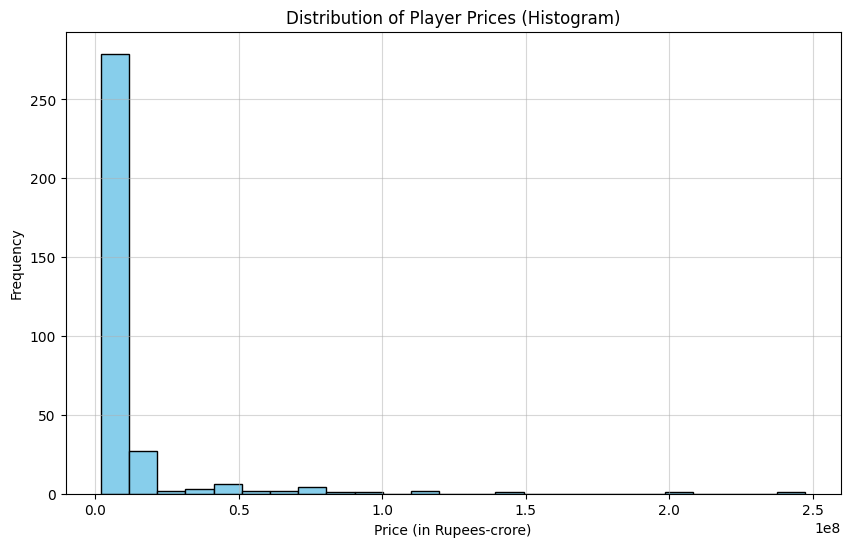

In [217]:
#20.Distribution of player prices using a box plot or histogram.
player_prices = df['PRICE']

player_prices_series = pd.Series(player_prices)
num_bins = 25

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(player_prices, bins=num_bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Prices (Histogram)')
plt.xlabel('Price (in Rupees-crore)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.5)
plt.show()


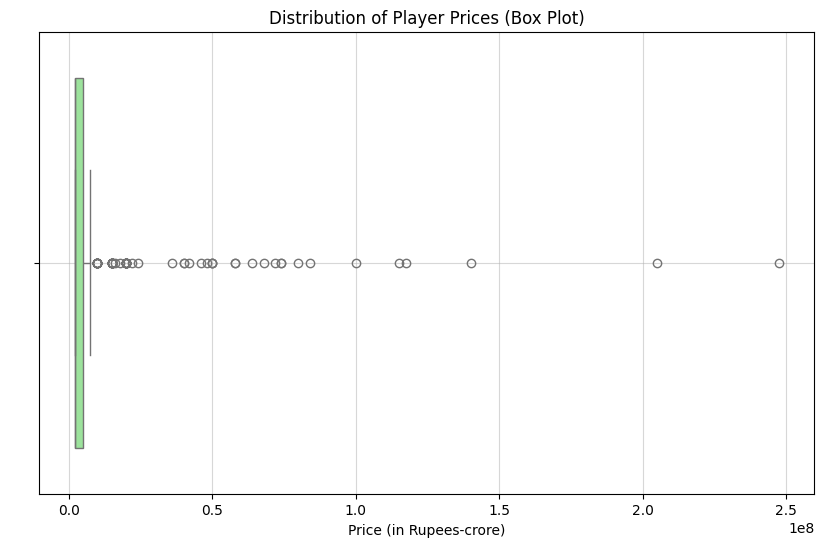

In [218]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=player_prices_series, color='lightgreen')
plt.title('Distribution of Player Prices (Box Plot)')
plt.xlabel('Price (in Rupees-crore)')
plt.ylabel(' ') # No y-axis label needed for box plots
plt.grid(True, alpha=0.5)
plt.show()